<div style="text-align: center;"><div  style="color:#7f0000; font-size:18px; font-weight:bold; line-height:30px;">Task 6 : Prediction using Decision Tree Algorithm</div></div>
<div style="text-align: center; color:#006666; font-size:18px;line-height:30px;"><strong>By : </strong>Sapna Singh</div> 

### Step 1: Import important libraries 
 

In [1]:
import numpy as np # mathematical fun
import pandas as pd # manipulating data 
import matplotlib.pyplot as plt # data visualizayion
import seaborn as sns # data Visulaization 
import warnings 
warnings.filterwarnings("ignore")

### Step 2: Loading our data 

In [2]:
data=pd.read_csv(r"C:\Users\sapna\Desktop\TSF_Intenship\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

It's good that we have equal no of obs for each class

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

It's a clean data with no missing values

In [8]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [9]:
data_1= data.copy()

In [10]:
data_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3 : Label Encoding for our target column Species 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
data_1["Species"]=le.fit_transform(data_1["Species"])

In [14]:
data_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
data_1["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

### Step 4 : Model Building 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X= data_1.drop(["Species"],axis=1)
y=data_1["Species"]

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.75,stratify=y,random_state=100)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 5), (38, 5), (112,), (38,))

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier=DecisionTreeClassifier()

In [22]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
predictions=classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9736842105263158


In [25]:
predictions

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [26]:
from sklearn.metrics import  confusion_matrix
confusion_matrix_3X3=np.array(confusion_matrix(y_test,predictions))
confusion_matrix_3X3

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 12]], dtype=int64)

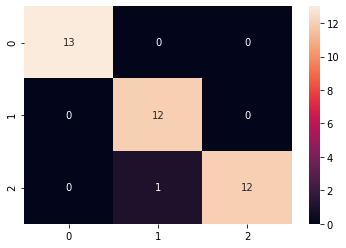

In [27]:
sns.heatmap(confusion_matrix_3X3, annot=True)

In [28]:
# define input
new_input = [[1,5.7,3.4,5.6,0.2]]### i have put 1 at the start as I have not droped ID column
# get prediction for new input
new_output = classifier.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[1, 5.7, 3.4, 5.6, 0.2]] [0]


As we can see our model has predicted the output for unseen data 